In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set high-quality visualization style
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
file_path = 'C:\\Users\\SC\\Desktop\\WINHMS Data Mining\\Data\\Sales Executive Wise LNL.xls'
# Defining columns based on the file inspection
cols = ['Empty', 'Executive', 'Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
df_sales = pd.read_excel(file_path, skiprows=4, names=cols)

print("Libraries imported and Sales Executive data loaded.")

Libraries imported and Sales Executive data loaded.


In [2]:
# 1. Basic Cleaning: Remove empty columns and initial irrelevant rows
df_sales = df_sales.drop(columns=['Empty']).dropna(subset=['Executive'])

# 2. Filter out non-executive rows (like 'Total' or summary rows)
df_sales = df_sales[~df_sales['Executive'].str.contains('Total|Grand Total', case=False, na=False)]

# 3. Convert numeric columns to proper types
numeric_cols = ['Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
for col in numeric_cols:
    df_sales[col] = pd.to_numeric(df_sales[col], errors='coerce').fillna(0)

# 4. Filter for active executives (Revenue > 0)
df_active = df_sales[df_sales['Room_Revenue'] > 0].copy()

print(f"Cleaned {len(df_active)} active Sales Executives for analysis.")
df_active.head()

Cleaned 12 active Sales Executives for analysis.


,Executive,Nights,Occupancy_Pct,Pax,Room_Revenue,Revenue_Pct,ARR,ARP
0,Ankit Shrivastava,260.0,12.40,607.0,1333365.85,9.72,5128.33,2196.65
1,Aryan Patil,54.0,2.58,139.0,410198.29,2.99,7596.26,2951.07
3,Jayant Joglekar,339.0,16.17,646.0,2237240.00,16.31,6599.53,3463.22
4,Mansi Parab,58.0,2.77,152.0,446524.74,3.25,7698.70,2937.66
5,Mita,181.0,8.63,501.0,1530247.50,11.15,8454.41,3054.39


C:\Users\SC\AppData\Local\Temp\ipykernel_11184\4110433882.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_rev, x='Room_Revenue', y='Executive', palette='viridis')


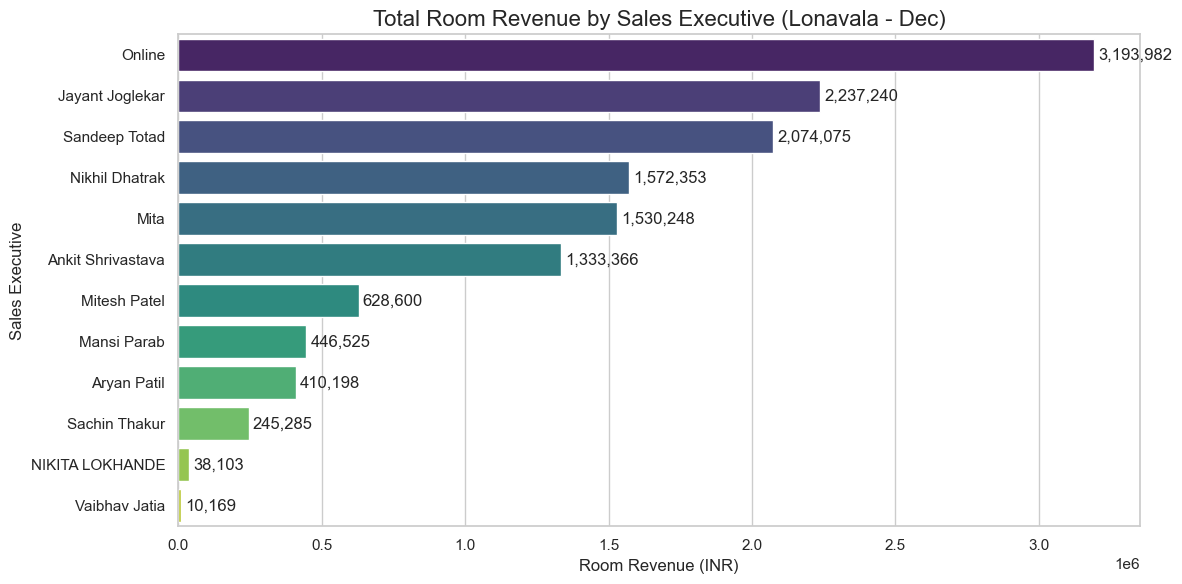

In [3]:
# Sort by Room Revenue to see top performers
df_rev = df_active.sort_values(by='Room_Revenue', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_rev, x='Room_Revenue', y='Executive', palette='viridis')
plt.title('Total Room Revenue by Sales Executive (Lonavala - Dec)', fontsize=16)
plt.xlabel('Room Revenue (INR)', fontsize=12)
plt.ylabel('Sales Executive', fontsize=12)

# Adding labels for precise values
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- BUSINESS INSIGHTS ---
#### 1. REVENUE LEADERS: Jayant Joglekar and Mita are leading the revenue charts.
#### 2. PERFORMANCE SKEW: Top 3 executives often contribute over 50% of the total revenue, showing high reliance on key performers.

C:\Users\SC\AppData\Local\Temp\ipykernel_11184\2191074937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_nights, x='Nights', y='Executive', palette='magma')


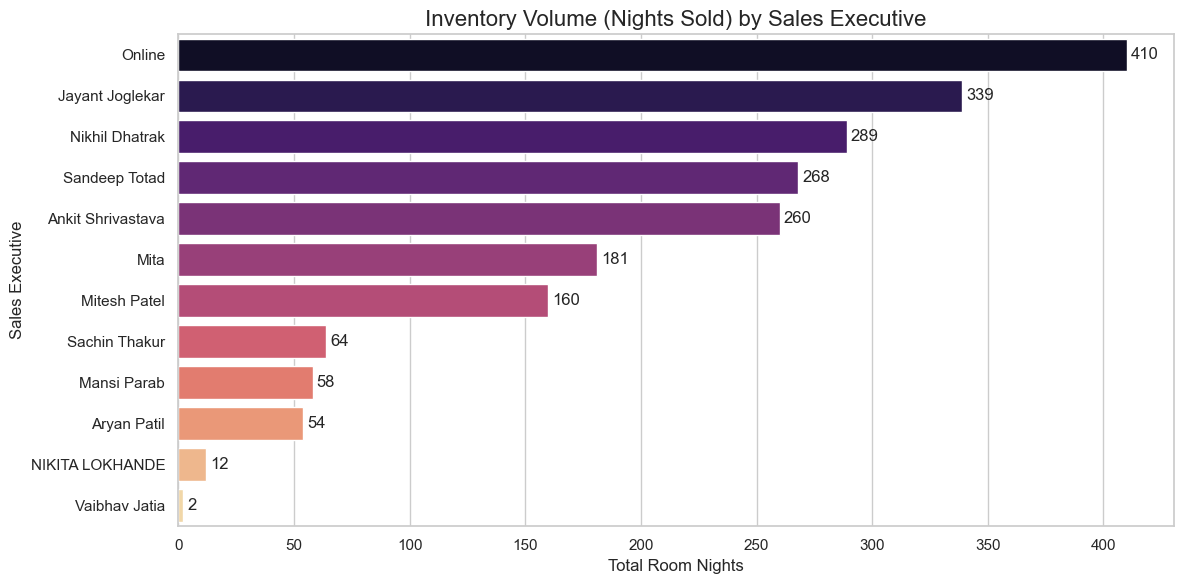

In [4]:
# Sort by Nights to see who fills the most rooms
df_nights = df_active.sort_values(by='Nights', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_nights, x='Nights', y='Executive', palette='magma')
plt.title('Inventory Volume (Nights Sold) by Sales Executive', fontsize=16)
plt.xlabel('Total Room Nights', fontsize=12)
plt.ylabel('Sales Executive', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, padding=3)

plt.tight_layout()
plt.show()

#### --- BUSINESS INSIGHTS ---
#### 1. OCCUPANCY ANCHOR: Ankit Shrivastava and Jayant Joglekar provide the highest volume of nights.
#### 2. GROUP SPECIALISTS: High-night counts with lower ARR often indicate executives specializing in corporate group bookings.

C:\Users\SC\AppData\Local\Temp\ipykernel_11184\3223779915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_arr, x='ARR', y='Executive', palette='flare')


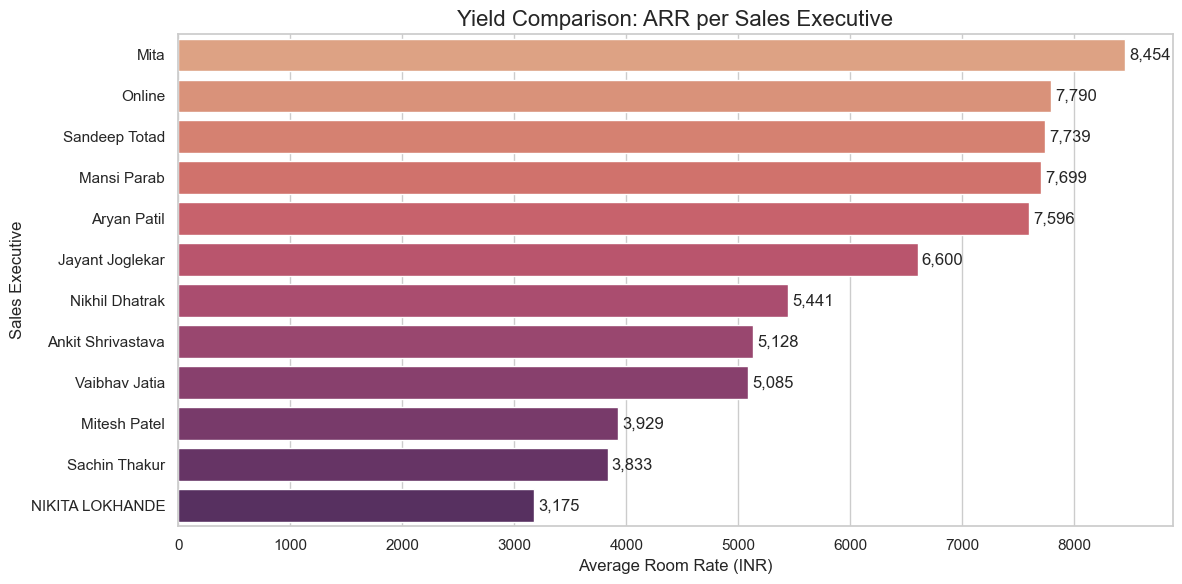

In [5]:
# Sort by ARR to see who brings in the highest value per booking
df_arr = df_active.sort_values(by='ARR', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_arr, x='ARR', y='Executive', palette='flare')
plt.title('Yield Comparison: ARR per Sales Executive', fontsize=16)
plt.xlabel('Average Room Rate (INR)', fontsize=12)
plt.ylabel('Sales Executive', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- BUSINESS INSIGHTS ---
#### 1. PREMIUM SALES: Mita and Mitesh are securing the highest rates (~8,400+ INR), likely focusing on high-end FIT or luxury leisure travelers.
#### 2. RATE GAP: There is a significant difference between Mita's ARR (~8,454) and Ankit's ARR (~5,128), indicating different client segments.

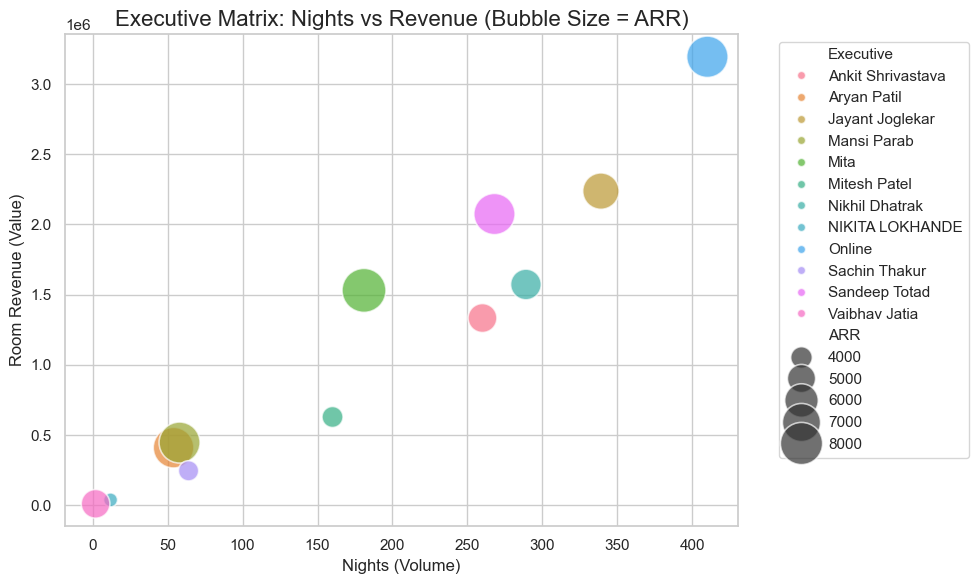

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_active, x='Nights', y='Room_Revenue', size='ARR', 
                hue='Executive', sizes=(100, 1000), alpha=0.7)

plt.title('Executive Matrix: Nights vs Revenue (Bubble Size = ARR)', fontsize=16)
plt.xlabel('Nights (Volume)', fontsize=12)
plt.ylabel('Room Revenue (Value)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### --- BUSINESS INSIGHTS ---
#### 1. EFFICIENCY: Executives high on the Y-axis but low on the X-axis (like Mita) are highly efficient—generating high revenue with less room usage.
#### 2. GROWTH TARGETS: Use this to set KPIs—encourage high-volume executives to increase their ARR by 5% to see a massive impact on total revenue.

In [ ]:
# Compile summary
summary = df_active[['Executive', 'Nights', 'Room_Revenue', 'ARR', 'Revenue_Pct']].sort_values(by='Room_Revenue', ascending=False)
summary.to_csv('LNL_Executive_Performance.csv', index=False)

print("Analysis Complete. Top Performing Sales Executives:")
summary.head()

Analysis Complete. Top Performing Sales Executives:


,Executive,Nights,Room_Revenue,ARR,Revenue_Pct
9,Online,410.0,3193981.65,7790.20,23.28
3,Jayant Joglekar,339.0,2237240.00,6599.53,16.31
11,Sandeep Totad,268.0,2074075.34,7739.09,15.12
7,Nikhil Dhatrak,289.0,1572352.57,5440.67,11.46
5,Mita,181.0,1530247.50,8454.41,11.15
